In [22]:
import matplotlib.pyplot as plt
import numpy as np
from diffusionProcess import DiffusionProcess, drift, sigma, generate_linear_drift
from strategies import DataDrivenImpulseControl, generate_reward_func, OptimalStrategy

The idea of this document is to see how it will affect the simulation, when we use data from the exploitation periods to estimate the invariant density, the invariant distribution function and the optimal threshold. We will try using all of the exploitation data, but we will also see how it would affect the simulation if the exploitation data only accounts for a percentage of all the data used when estimating.

# Checking the effect on the invariant density

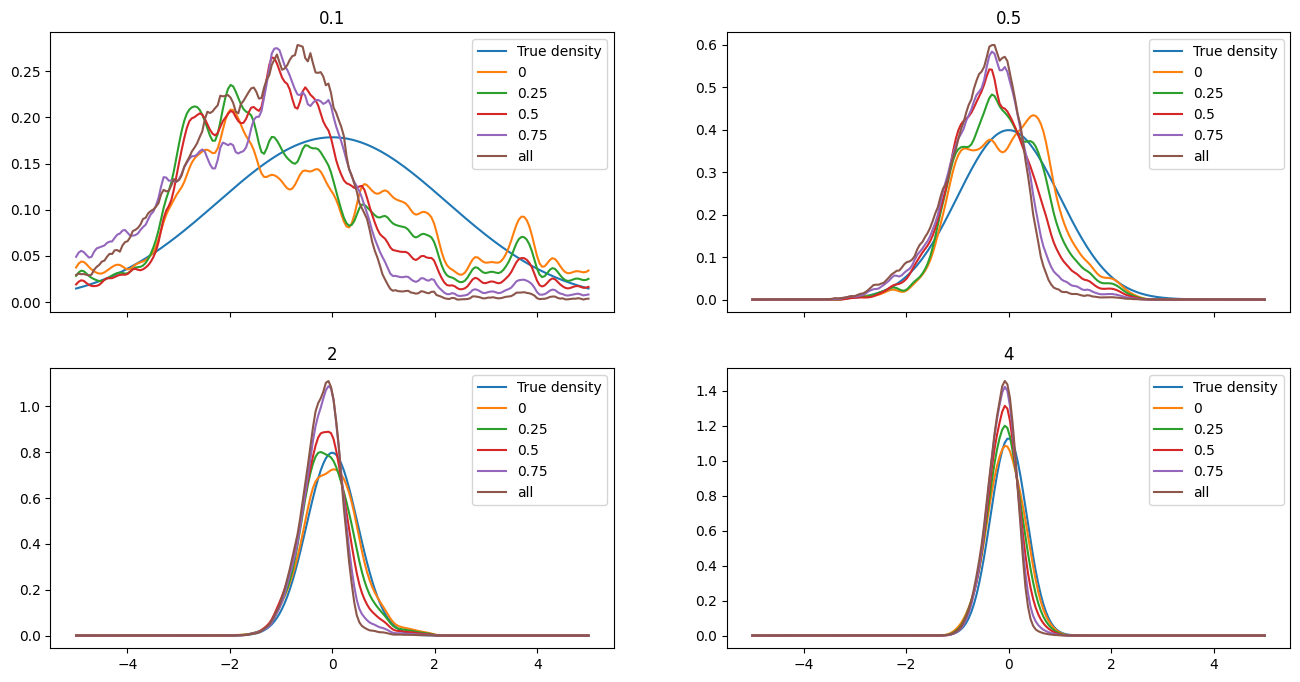

In [92]:
Cs = [0.1, 0.5, 2, 4]
fData = []
trueDens = []
for c in Cs:
    b = generate_linear_drift(c, 0)
    r = generate_reward_func(1, 0.9)

    diffProcess = DiffusionProcess(b, sigma)
    #optStrat = OptimalStrategy(diffProcess, r)
    dataStrat = DataDrivenImpulseControl(r, sigma)

    T = 1000
    exploration_data, exploitation_data = dataStrat.get_exploration_and_exploitation_data(diffpros=diffProcess, T=T, dt=0.01)

    vals = np.linspace(-5, 5, 200)
    dens = [diffProcess.invariant_density(v) for v in vals]
    trueDens.append(dens)

    alphas = [0, 0.25, 0.50, 0.75, "all"]
    alpha_data = []

    for alpha in alphas:
        if alpha == "all":
            data = exploration_data + exploitation_data
        else:
            data = exploration_data + exploitation_data[-(round(len(exploration_data)/(1/alpha - 1))):] if alpha != 0 else exploration_data
        dataStrat.bandwidth = 1/np.sqrt(len(data)*0.01)
        dataStrat.fit(data)
        fs = [dataStrat.pdf_eval(v) for v in vals]
        alpha_data.append(fs)
    
    fData.append(alpha_data)


fig, axes = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(16, 8))
for i, c in enumerate(Cs):
    axes[i//2][i%2].plot(vals, trueDens[i], label="True density")
    for j, alpha in enumerate(alphas):
        axes[i//2][i%2].plot(vals, fData[i][j], label=alpha)
    axes[i//2][i%2].legend()
    axes[i//2][i%2].set_title(str(c))

plt.show()

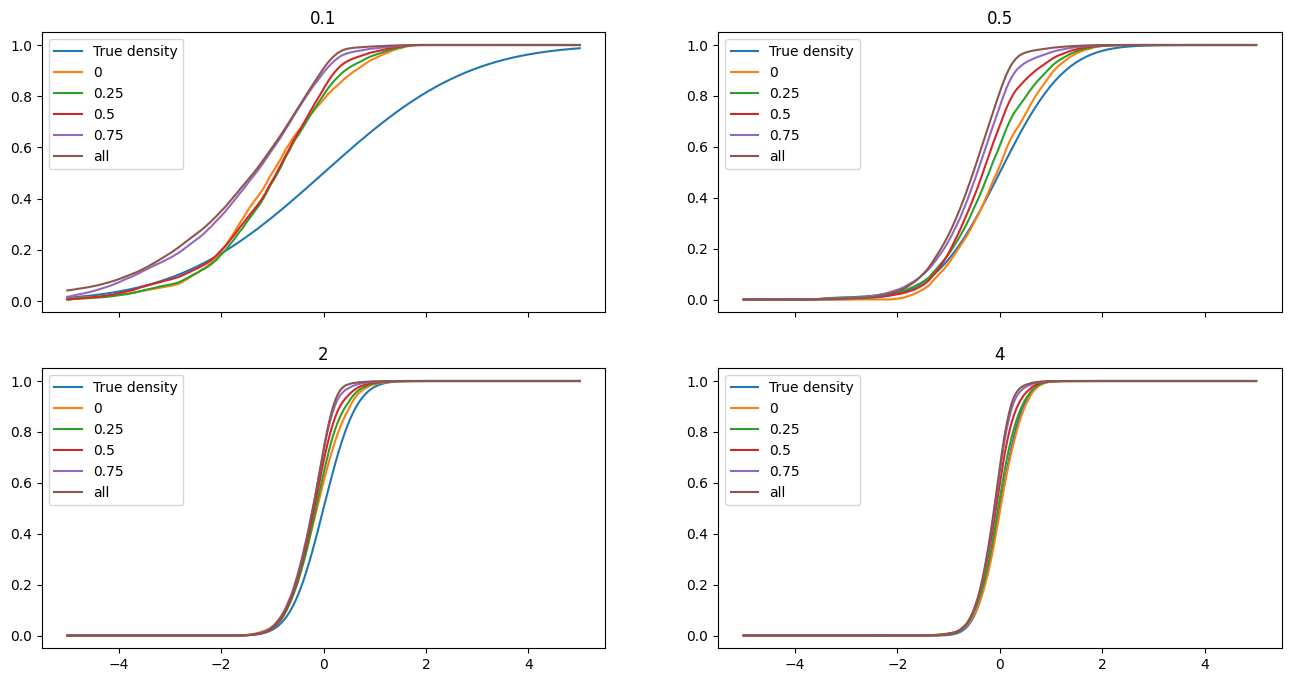

In [93]:
Cs = [0.1, 0.5, 2, 4]
fData = []
trueDens = []
for c in Cs:
    b = generate_linear_drift(c, 0)
    r = generate_reward_func(1, 0.9)

    diffProcess = DiffusionProcess(b, sigma)
    #optStrat = OptimalStrategy(diffProcess, r)
    dataStrat = DataDrivenImpulseControl(r, sigma)

    T = 1000
    exploration_data, exploitation_data = dataStrat.get_exploration_and_exploitation_data(diffpros=diffProcess, T=T, dt=0.01)

    vals = np.linspace(-5, 5, 200)
    dens = [diffProcess.invariant_distribution(v) for v in vals]
    trueDens.append(dens)

    alphas = [0, 0.25, 0.50, 0.75, "all"]
    alpha_data = []

    for alpha in alphas:
        if alpha == "all":
            data = exploration_data + exploitation_data
        else:
            data = exploration_data + exploitation_data[-(round(len(exploration_data)/(1/alpha - 1))):] if alpha != 0 else exploration_data
        dataStrat.bandwidth = 1/np.sqrt(len(data)*0.01)
        dataStrat.fit(data)
        fs = [dataStrat.cdf_eval(v) for v in vals]
        alpha_data.append(fs)
    
    fData.append(alpha_data)


fig, axes = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(16, 8))
for i, c in enumerate(Cs):
    axes[i//2][i%2].plot(vals, trueDens[i], label="True density")
    for j, alpha in enumerate(alphas):
        axes[i//2][i%2].plot(vals, fData[i][j], label=alpha)
    axes[i//2][i%2].legend()
    axes[i//2][i%2].set_title(str(c))

plt.show()